<a href="https://colab.research.google.com/github/JoaoCuri/pequenos_desafios/blob/master/LLeaning_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means

É um método não supervisionado que permite a identificação de grupos nos nossos dados. Um ponto importante em relação ao K-Means é que você precisa ter ideia da quantidade de clusters que os seus dados vão formar antes de usar o modelo.

Usado para modelagem de custo de mercado
Segmentação de usuário
Detcção de fraude em pedidos de seguros

Ao usar o K-means é necessário:

1 - Colocar suas variáveis em escala antes de clusterizar seus dados


2 - Olhe para o scatterplot para estimar o número de centróides e definir o valor do parametro K no modelo


precisão(precision) = medida de relevância do modelo, das respostas encontradas qual a % de respostas relevantes para o que você procura.

revocação (recall) = medida de completude do modelo,% encontrada das respostas relevantes possíveis



In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report


%matplotlib inline
rcParams['figure.figsize'] = 7,4
plt.style.use('seaborn-whitegrid')


In [9]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
variable_names = iris.feature_names
iris_df = pd.DataFrame(iris.data)
iris_df.columns = variable_names 

**Constuindo o modelo**

In [10]:
clustering = KMeans(n_clusters=3, random_state=5).fit(X)
clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

**Graficando o resultado do modelo**

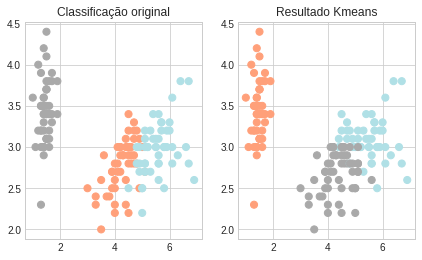

In [15]:
cores = np.array(['darkgray','lightsalmon','powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['sepal width (cm)'],
            c=cores[iris.target],s=50)
plt.title('Classificação original')

plt.subplot(1,2,2)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['sepal width (cm)'],
            c=cores[clustering.labels_],s=50)
plt.title('Resultado Kmeans');

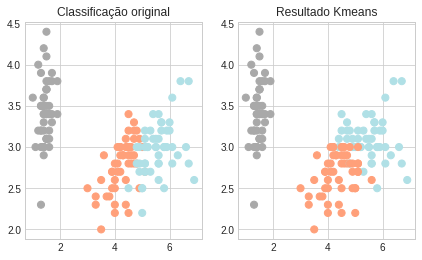

In [24]:
# deixando as cores iguais
relabel = np.choose(clustering.labels_,[1,0,2]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['sepal width (cm)'],
            c=cores[iris.target],s=50)
plt.title('Classificação original')

plt.subplot(1,2,2)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['sepal width (cm)'],
            c=cores[relabel],s=50)
plt.title('Resultado Kmeans');

**Avaliando a clusterização resultante**

In [25]:
metricas = classification_report(y,relabel)
print(metricas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



Em machine learning sempre estamos buscando uma precisão e um recall muito alto.